# Import Python modules

In [1]:
import pandas as pd
import xlrd
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
#from pandasql import sqldf
import datetime
import csv
import pdb
from tqdm.notebook import tqdm
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
def minor_formatter(x, ind):
    # only format if we don't overlap with a major tick
    if np.mod(x, 1) < .1:
        return ''
    return '{:.1f}'.format(np.mod(x, 1))
def alternate_formatter(x, ind):
    rm = np.mod(x, 1)
    if np.abs(rm) < .1:
        return '{:d}'.format(int(x))
    return '{:.1f}'.format(rm)

# Read lab data

In [2]:
path1 = os.getcwd()
path = os.path.join(path1, 'Data_WRC')
file = os.path.join(path, 'LabData.csv')
Data = pd.read_csv(file,sep=';', header=0)
Data = Data.drop(Data.index[[10,11,12,13]])
print(Data)

IndexError: index 10 is out of bounds for axis 0 with size 10

In [3]:
pF = Data['pF']
r995 = Data['995']
r930 = Data['930']
r597 = Data['597']
r216 = Data['216']
r889 = Data['889']
r588 = Data['588']
r104 = Data['104']
r553 = Data['553']
r408 = Data['408']
r163 = Data['163']
r567 = Data['567']
r722 = Data['722']

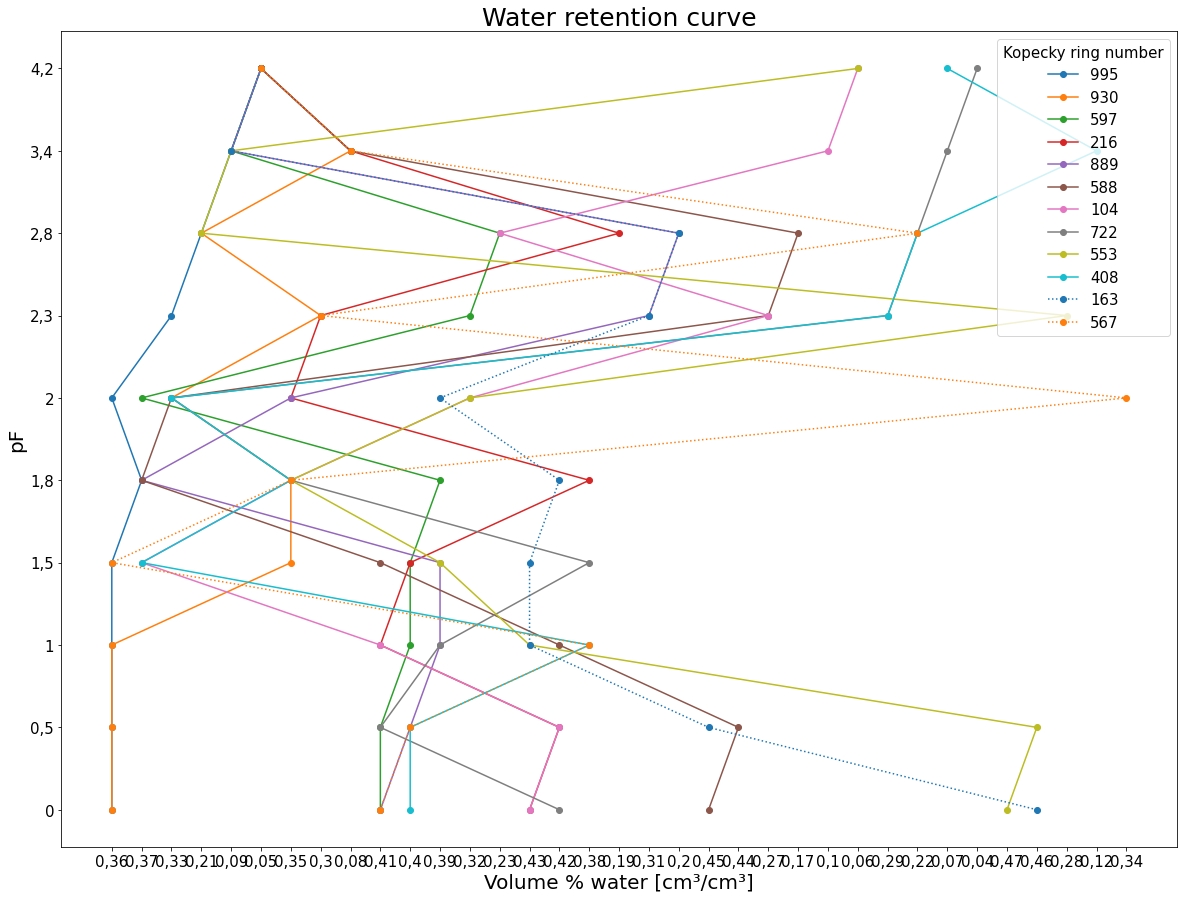

In [4]:
plt.figure(figsize=(20,15))
plt.plot(r995,pF, marker = 'o', label='995')
plt.plot(r930,pF, marker = 'o', label='930')
plt.plot(r597,pF, marker = 'o', label='597')
plt.plot(r216,pF, marker = 'o', label='216')
plt.plot(r889,pF, marker = 'o', label='889')
plt.plot(r588,pF, marker = 'o', label='588')
plt.plot(r104,pF, marker = 'o', label='104')
plt.plot(r722,pF, marker = 'o', label='722')
plt.plot(r553,pF, marker = 'o', label='553')
plt.plot(r408,pF, marker = 'o', label='408')
plt.plot(r163,pF, marker = 'o', label='163', linestyle='dotted')
plt.plot(r567,pF, marker = 'o', label='567', linestyle='dotted')
plt.legend(title = "Kopecky ring number", fontsize = 15, title_fontsize = 15)
plt.title('Water retention curve', fontsize = 25)
plt.ylabel('pF', fontsize = 20)
plt.xlabel('Volume % water [cm³/cm³]', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.savefig('WRC.png')

In [5]:
def thetaFun(psi,pars):
  Se=(1+abs(psi*pars['alpha'])**pars['n'])**(-pars['m'])
  Se[psi>=0]=1.
  return pars['tr']+(pars['ts']-pars['tr'])*Se
  
def CFun(psi,pars):
  Se=(1+abs(psi*pars['alpha'])**pars['n'])**(-pars['m'])
  Se[psi>=0]=1.
  dSedh=pars['alpha']*pars['m']/(1-pars['m'])*Se**(1/pars['m'])*(1-Se**(1/pars['m']))**pars['m']
  # dSedh(psi>=0)=0;
  return Se*pars['Ss']+(pars['ts']-pars['tr'])*dSedh



def KFun(psi,pars):
  Se=(1+abs(psi*pars['alpha'])**pars['n'])**(-pars['m'])
  Se[psi>=0]=1.
  return pars['Ks']*Se**pars['Lambda']*(1-(1-Se**(1/pars['m']))**pars['m'])**2

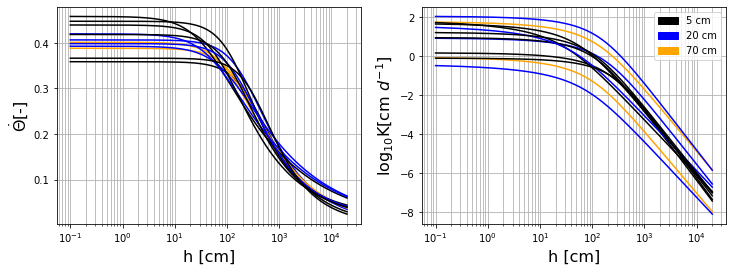

In [6]:
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
#hydraulic paramters determined
datadir = r"C:/Anne-Marie/KUL/Master/Masterthesis/github repository/"
data = pd.read_excel(datadir + 'SHPs_HYprop.xlsx')
##make your excel file
depths=[5,20,70]
data['m']=1-(1/data['n'])
ftsz=16
psi = np.linspace(-.1,-20000,100000)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
colors = ['black','blue','orange']
for i in range(np.shape(data)[0]):
    pars = data.loc[i]
    
    if data.loc[i].depth==depths[0]:
        color=colors[0]    
    if data.loc[i].depth==depths[1]:
        color=colors[1]    
    if data.loc[i].depth==depths[2]:
        color=colors[2]     
    
    ax1.plot((abs(psi)),thetaFun(psi,pars),color)
    ax2.plot((abs(psi)),np.log10(KFun(psi,pars)),color)



ax1.set_xscale("log")
ax2.set_xscale("log")
ax1.set_ylabel('$\dot{\Theta}$[-]',fontsize=ftsz)
ax2.set_ylabel('$\log_{10}$K[cm $d^{-1}$]',fontsize=ftsz)
ax1.set_xlabel('h [cm]',fontsize=ftsz)
ax2.set_xlabel('h [cm]',fontsize=ftsz)



first_patch = mpatches.Patch(color=colors[0], label='5 cm')
sec_patch = mpatches.Patch(color=colors[1], label='20 cm')
third_patch = mpatches.Patch(color=colors[2], label='70 cm')
ax1.grid( which="both")
ax2.grid( which="both")



plt.legend(handles=[first_patch, sec_patch,third_patch])

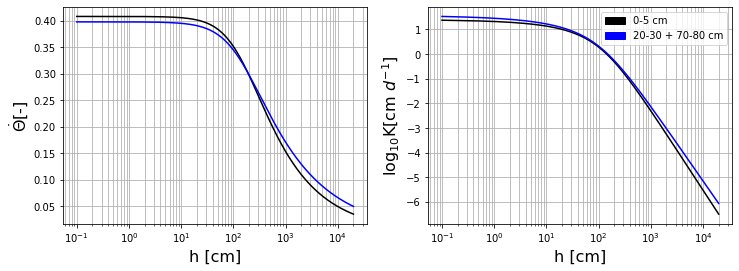

In [7]:
### averaged per soil horizon
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
#hydraulic paramters determined
datadir = r"C:/Anne-Marie/KUL/Master/Masterthesis/github repository/"
data = pd.read_excel(datadir + 'RETC_Averaged.xlsx')
##make your excel file
depths=[5,20]
data['m']=1-(1/data['n'])
ftsz=16
psi = np.linspace(-.1,-20000,100000)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
colors = ['black','blue']
for i in range(np.shape(data)[0]):
    pars = data.loc[i]
    
    if data.loc[i].depth==depths[0]:
        color=colors[0]    
    if data.loc[i].depth==depths[1]:
        color=colors[1]         
    
    ax1.plot((abs(psi)),thetaFun(psi,pars),color)
    ax2.plot((abs(psi)),np.log10(KFun(psi,pars)),color)



ax1.set_xscale("log")
ax2.set_xscale("log")
ax1.set_ylabel('$\dot{\Theta}$[-]',fontsize=ftsz)
ax2.set_ylabel('$\log_{10}$K[cm $d^{-1}$]',fontsize=ftsz)
ax1.set_xlabel('h [cm]',fontsize=ftsz)
ax2.set_xlabel('h [cm]',fontsize=ftsz)



first_patch = mpatches.Patch(color=colors[0], label='0-5 cm')
sec_patch = mpatches.Patch(color=colors[1], label='20-30 + 70-80 cm')
ax1.grid( which="both")
ax2.grid( which="both")



plt.legend(handles=[first_patch, sec_patch])